# MTG Power-Creep: Analysis & Visualization
In the first notebook file, we selected the rows that are exploitable. Each selected card respects the following conditions:
* Is in english
* Is from a core set
* Is a creature
* Can be opened in a booster
* Has an exploitable power & toughness (no 'NaN', '*', or '0' toughness)

We then created a dataframe containing summary values on each one of the 20 core sets. The fields for each set are:
* set: set code
* name: set full name
* release: release date
* display_str: a string containing the set code and date for our plots
* avg_cmc: avg cmc of creatures in this set
* avg_power: avg power of creatures in this set
* avg_toughness: avg toughness of creatures in this set
* avg_effectiveness: positive or negative percentage translating how much better or worse the stats of an average creature of this set is compared to what is expected. The expected stats of a creature is calculated as the average stats of a creature with this exact mana cost in any core set.

In [13]:
import pandas as pd

sets = pd.read_csv("sets_summary.csv", parse_dates = ["release_date"])
sets

,set,name,display_str,release_date,avg_cmc,avg_power,avg_toughness,avg_effectiveness
0,lea,Limited Edition Alpha,LEA (1993),1993-08-05,3.423529,2.258824,2.988235,-0.508065
1,leb,Limited Edition Beta,LEB (1993),1993-10-04,3.423529,2.258824,2.988235,-0.508065
2,2ed,Unlimited Edition,2ED (1993),1993-12-01,3.423529,2.258824,2.988235,-0.508065
3,3ed,Revised Edition,3ED (1994),1994-04-01,3.350515,2.237113,3.000000,-0.293019
4,4ed,Fourth Edition,4ED (1995),1995-04-01,3.444444,2.159722,2.763889,-8.141629
5,5ed,Fifth Edition,5ED (1997),1997-03-24,3.393064,2.132948,2.566474,-8.346933
6,6ed,Classic Sixth Edition,6ED (1999),1999-04-21,3.380952,2.214286,2.611111,-2.079312
7,7ed,Seventh Edition,7ED (2001),2001-04-11,3.489362,2.276596,2.617021,-3.311375
8,8ed,Eighth Edition,8ED (2003),2003-07-28,3.417219,2.317881,2.655629,0.219854
9,9ed,Ninth Edition,9ED (2005),2005-07-29,3.445860,2.286624,2.630573,-2.795058


## Preparing data for visualization
Our goal is to visualize the evolution of the sets' average effectiveness over time.

We face one problem: the interval between the release dates of two consecutive sets is not consistent: some have a gap of two months, others have a gap of 3 years. As is, it makes it hard to create a readable plot.

Our solution will be to:

* Group sets by year with an aggregation method of mean. A year will contain mutliple sets (1993), and some years will have none (1996, 1998, 2000, 2002, 2004, 2006, 2008, 2016, and 2017).
* Create an initial dataframe whose index are the years from the birth of MTG to the latest set release year
* Populate our dataframe with the aggregated sets data
* Fill the missing rows with the average of the previous and next rows

This method does make for a slightly altered representation of reality, but has the merit of being simple to implement and visualize.

We start by grouping the sets by year:

In [93]:
import datetime as dt

sets["release_year"] = sets["release_date"].dt.year    # we create a new column isolating the release year

year_sets = sets.groupby("release_year").mean()
year_sets

,avg_cmc,avg_power,avg_toughness,avg_effectiveness
release_year,,,,
1993,3.423529,2.258824,2.988235,-0.508065
1994,3.350515,2.237113,3.000000,-0.293019
1995,3.444444,2.159722,2.763889,-8.141629
1997,3.393064,2.132948,2.566474,-8.346933
1999,3.380952,2.214286,2.611111,-2.079312
2001,3.489362,2.276596,2.617021,-3.311375
2003,3.417219,2.317881,2.655629,0.219854
2005,3.445860,2.286624,2.630573,-2.795058
2007,3.488462,2.442308,2.634615,-0.666655


We create a new dataframe whose index are the years from the birth of MTG to the latest set release year:

In [42]:
all_years_array = [year for year in range(year_sets.index.min(), year_sets.index.max() + 1)]
all_years = pd.DataFrame({"release_year": all_years_array})
all_years.head()

,release_year
0,1993
1,1994
2,1995
3,1996
4,1997


We now populate this dataframe with our aggregated sets data:

In [43]:
yearly_data = pd.merge(all_years, year_sets, "left", left_on="release_year", right_index=True)
yearly_data

,release_year,avg_cmc,avg_power,avg_toughness,avg_effectiveness
0,1993,3.423529,2.258824,2.988235,-0.508065
1,1994,3.350515,2.237113,3.000000,-0.293019
2,1995,3.444444,2.159722,2.763889,-8.141629
3,1996,NaN,NaN,NaN,NaN
4,1997,3.393064,2.132948,2.566474,-8.346933
5,1998,NaN,NaN,NaN,NaN
6,1999,3.380952,2.214286,2.611111,-2.079312
7,2000,NaN,NaN,NaN,NaN
8,2001,3.489362,2.276596,2.617021,-3.311375
9,2002,NaN,NaN,NaN,NaN


We now fill the NaN values with the average of the previous and next values:

In [61]:
yearly_data = yearly_data.interpolate(method='linear', limit_direction='forward', axis=0)
yearly_data.head()

,release_year,avg_cmc,avg_power,avg_toughness,avg_effectiveness
0,1993,3.423529,2.258824,2.988235,-0.508065
1,1994,3.350515,2.237113,3.000000,-0.293019
2,1995,3.444444,2.159722,2.763889,-8.141629
3,1996,3.418754,2.146335,2.665181,-8.244281
4,1997,3.393064,2.132948,2.566474,-8.346933


## Visualization
Now that our dataframe is ready, we can plot it.
We will use a line plot in the style "FiveThirtyEight" with some small adjustments.

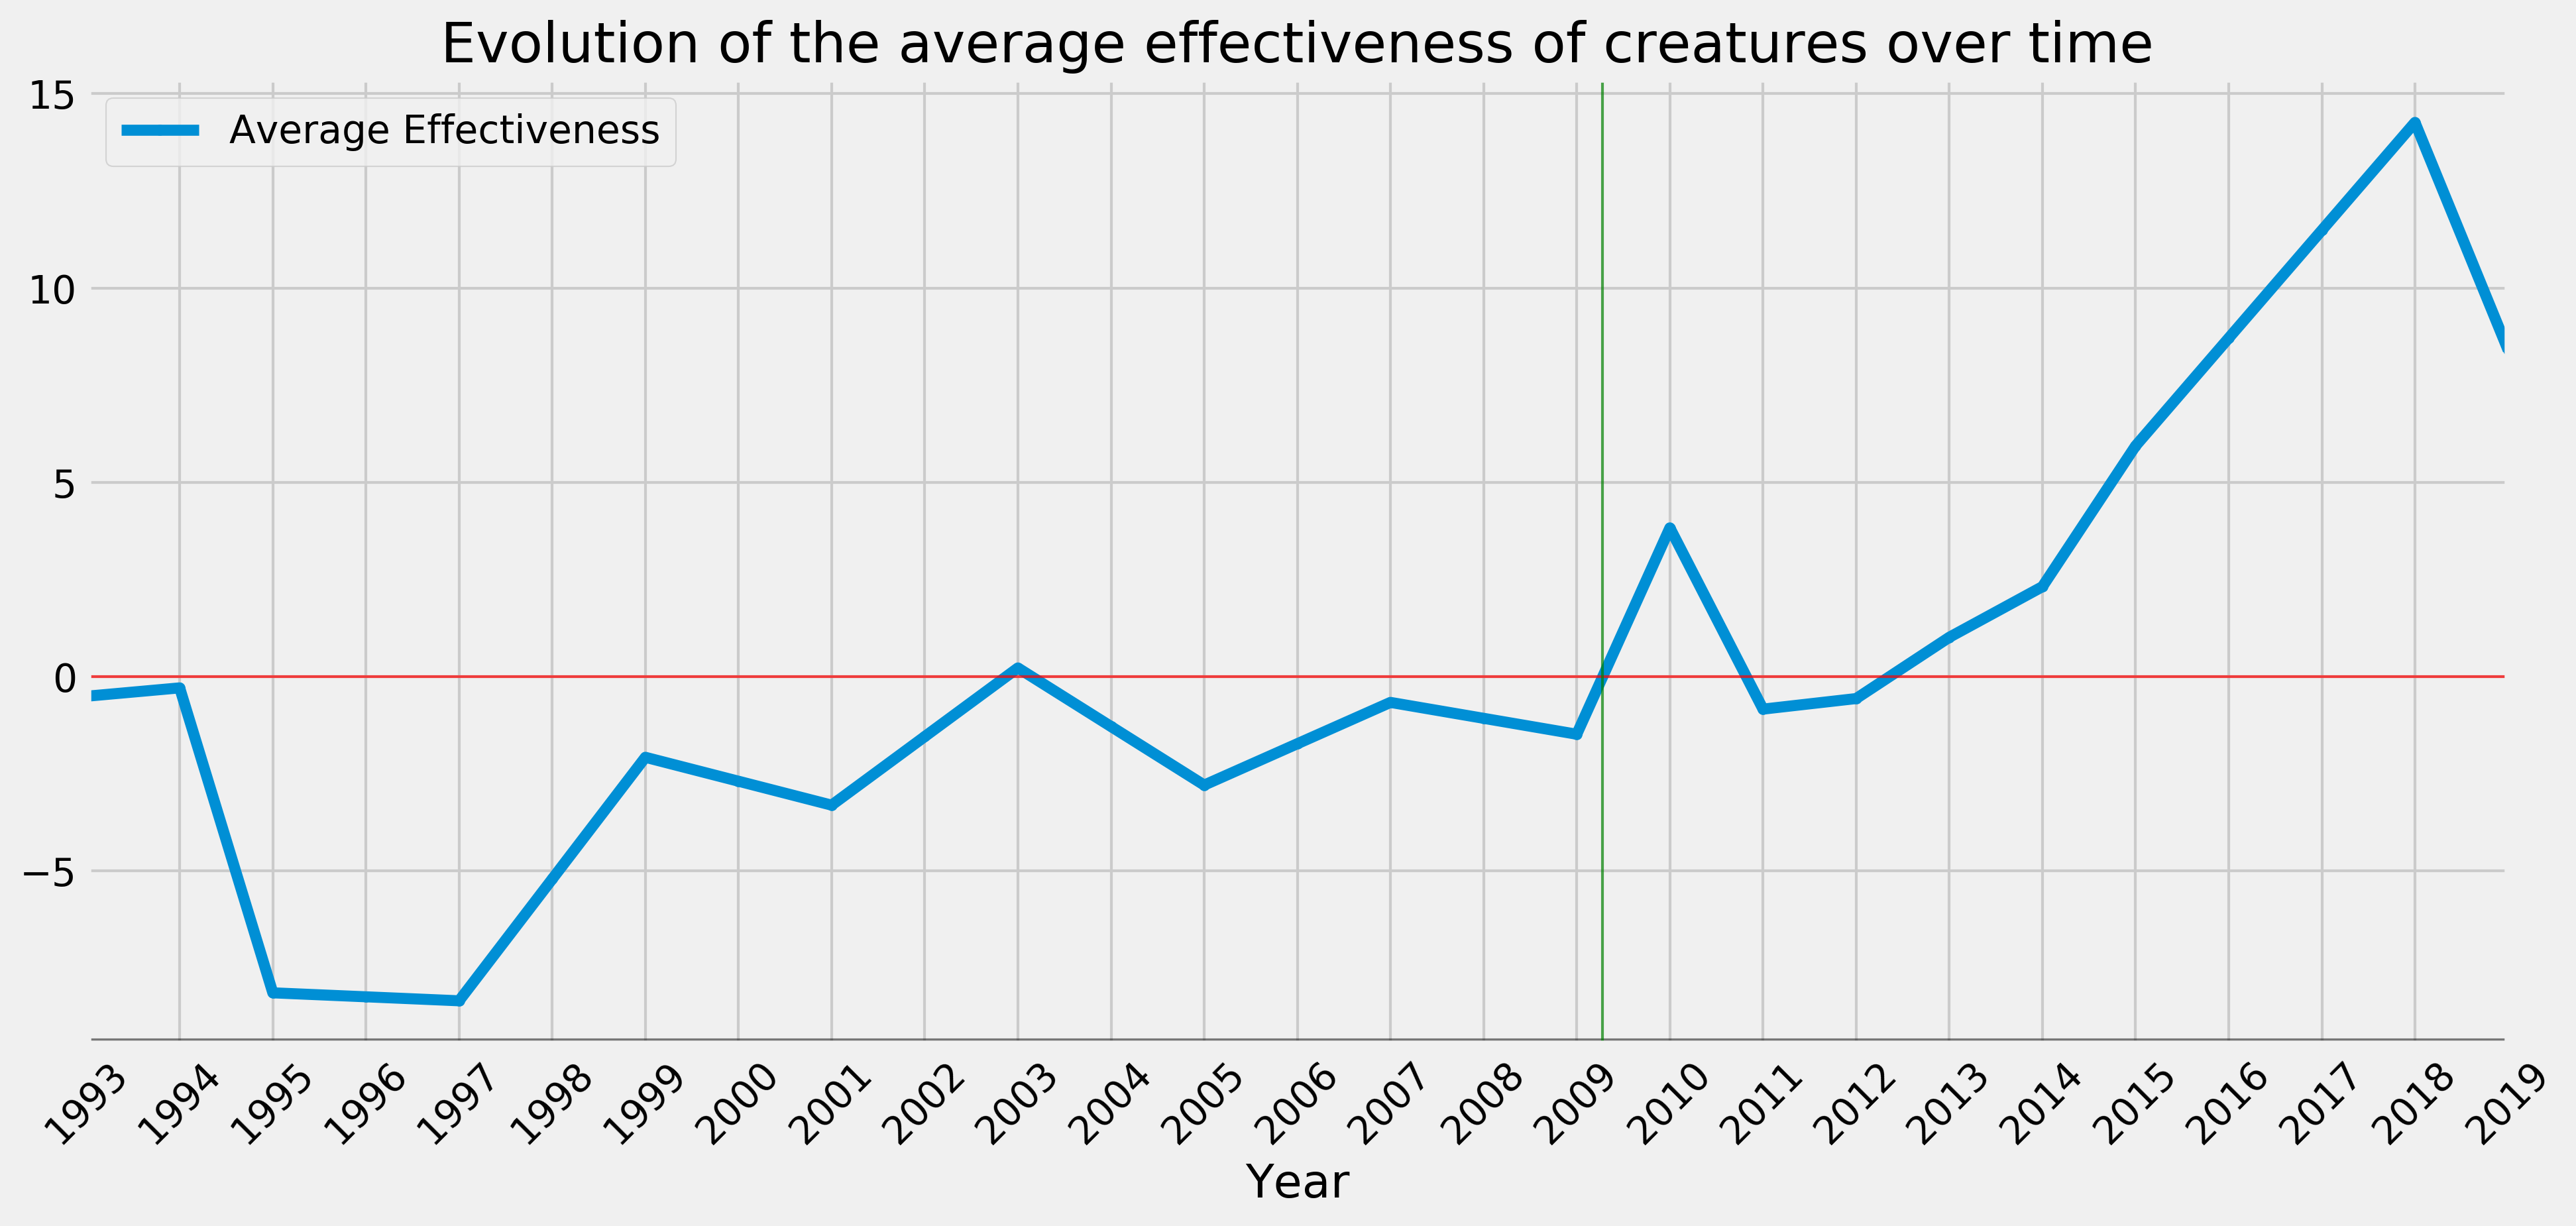

In [110]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

%matplotlib inline
mpl.rcParams['figure.dpi']= 300    # tells matplotlib to display inline plots at 300 DPI
mpl.rc("savefig", dpi = 300)       # tells matplotlib to save plots at 300 DPI
style.use("fivethirtyeight")

ax = yearly_data.plot(x="release_year", y="avg_effectiveness", figsize=(14,6), rot=45, marker=".",
                      title = "Evolution of the average effectiveness of creatures over time", label = "Average Effectiveness")
ax.set_xticks(yearly_data["release_year"])
ax.set_xticklabels(all_years_array)
ax.set_xlabel("Year")
ax.axhline(0, color = "red", linewidth = 1, alpha = .7)    # y = 0 line
ax.axhline(yearly_data["avg_effectiveness"].min() - 1, color = "black", linewidth = 1, alpha = .5)    # x axis line
ax.axvline(2009.275, color = "green", linewidth = 1, alpha = .7)    # green vertical line seperating data points

# plt.savefig("effectiveness_over_time.pdf", bbox_inches='tight')    # saves the plot as a PDF file. Could also be in PNG

### Observations
Note: to simplify the sentences, I will use the word 'effectiveness' as 'the average effectiveness of creatures in sets released this year.
* All the sets before 2010 (green line) had an average or below average effectiveness, while almost all the sets after have an above average effectiveness
* The effectiveness varied a lot throughout MTG's history, going from 8.3% below average to 14.3% above average
* Recent effectiveness is spiking, with a record on 2018 (M19) with 14.3% above average effectiveness

In [109]:
sets["avg_effectiveness"].describe()

count    20.000000
mean      0.295666
std       5.089194
min      -8.346933
25%      -1.634266
50%      -0.508065
75%       1.335010
max      14.261696
Name: avg_effectiveness, dtype: float64

## Conclusion
Our simplistic analysis of MTG's Power-Creep tells us that it is going strong. It looks like it accelerates since 2018 with M19.

Even though our analysis is simplistic, it is fair to assume that the real evolution of the Power-Creep of creatures is similar to our results.

For those who are interested in the subject, the Power-Creep of creatures in MTG is intentional as creatures in early Magic were too weak. It is still legitimate to ask ourselves the question: is it too much?
Wizards of The Coast's (company who created MTG) philosophy on Power-Creep is to, for each set, make some cards better than average, others worse, therefore limiting the Power-Creep.

## Next Steps
To completement this analysis, we could complete many other tasks, including:
* Selecting pairs of cards examplifying Power-Creep
* Plotting and interpreting what composes the average effectiveness: avg_cmc, avg_power, avg_toughness
* Finding a different approach to measure Power-Creep in creatures.
* Completing the same analysis but including all the sets
* Researching on the possibility of measuring the effectiveness of non-creature spells

I might come back to this project and complete some of those.